#**Task 5**
###**Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors**.

##1. Step 1: Load the Data and Initial Inspection
This step involves loading the CSV file into a pandas DataFrame and getting a first look at its structure, columns, and initial missing values.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
file_path = '/content/drive/MyDrive/Prodigy internship /dataset_traffic_accident_prediction1.csv'

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it's in the correct directory.")
    exit()

# Display the first few rows
print("\n--- First 5 rows of the dataset ---")
print(df.head())

# Display basic information about the dataset
print("\n--- Dataset Info ---")
df.info()

# Display the number of missing values per column
print("\n--- Missing Values Count ---")
print(df.isnull().sum())

# Display the percentage of missing values per column
print("\n--- Missing Values Percentage ---")
print(df.isnull().sum() / len(df) * 100)


Dataset loaded successfully.

--- First 5 rows of the dataset ---
  Weather   Road_Type Time_of_Day  Traffic_Density  Speed_Limit  \
0   Rainy   City Road     Morning              1.0        100.0   
1   Clear  Rural Road       Night              NaN        120.0   
2   Rainy     Highway     Evening              1.0         60.0   
3   Clear   City Road   Afternoon              2.0         60.0   
4   Rainy     Highway     Morning              1.0        195.0   

   Number_of_Vehicles  Driver_Alcohol Accident_Severity      Road_Condition  \
0                 5.0             0.0               NaN                 Wet   
1                 3.0             0.0          Moderate                 Wet   
2                 4.0             0.0               Low                 Icy   
3                 3.0             0.0               Low  Under Construction   
4                11.0             0.0               Low                 Dry   

  Vehicle_Type  Driver_Age  Driver_Experience Road_Light

## Step 2: Data Cleaning and Preprocessing
This step focuses on handling missing values and ensuring data types are appropriate for analysis. For this dataset, empty strings are treated as missing values, so we'll replace them with NaN and then decide on an imputation strategy. For categorical columns, mode imputation is a common choice.

In [2]:
# Replace empty strings with NaN across the entire DataFrame
df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

print("\n--- Missing Values Count After Replacing Empty Strings ---")
print(df.isnull().sum())

# Impute missing values for key categorical columns with their mode
categorical_cols_to_impute = [
    'Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity',
    'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition'
]

for col in categorical_cols_to_impute:
    if col in df.columns:
        if df[col].isnull().any():
            mode_value = df[col].mode()[0] # mode() can return multiple if ties, take the first
            df[col].fillna(mode_value, inplace=True)
            print(f"Imputed missing values in '{col}' with mode: '{mode_value}'")

# Impute missing values for numerical columns with their median
numerical_cols_to_impute = [
    'Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles',
    'Driver_Alcohol', 'Driver_Age', 'Driver_Experience'
]

for col in numerical_cols_to_impute:
    if col in df.columns:
        # Convert to numeric first, coercing errors will turn non-numeric to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        if df[col].isnull().any():
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
            print(f"Imputed missing values in '{col}' with median: {median_value}")

# Ensure 'Accident' column is numeric (0 or 1) and handle any remaining NaNs if present
if 'Accident' in df.columns:
    df['Accident'] = pd.to_numeric(df['Accident'], errors='coerce')
    if df['Accident'].isnull().any():
        # For 'Accident', if it's the target variable, dropping rows might be better
        # or imputing with the most frequent class (mode) if it's a classification task.
        # For this analysis, let's impute with mode (0 or 1)
        accident_mode = df['Accident'].mode()[0]
        df['Accident'].fillna(accident_mode, inplace=True)
        print(f"Imputed missing values in 'Accident' with mode: {accident_mode}")

print("\n--- Missing Values Count After Imputation ---")
print(df.isnull().sum())



--- Missing Values Count After Replacing Empty Strings ---
Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64
Imputed missing values in 'Weather' with mode: 'Clear'
Imputed missing values in 'Road_Type' with mode: 'Highway'
Imputed missing values in 'Time_of_Day' with mode: 'Afternoon'
Imputed missing values in 'Accident_Severity' with mode: 'Low'
Imputed missing values in 'Road_Condition' with mode: 'Dry'
Imputed missing values in 'Vehicle_Type' with mode: 'Car'
Imputed missing values in 'Road_Light_Condition' with mode: 'Artificial Light'
Imputed missing values in 'Traffic_Density' with median: 1.0
Imputed missing values in 'Speed_Limit' with median

/tmp/ipython-input-2-1289861788.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-2-1289861788.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

## Step 3: Exploratory Data Analysis (EDA) and Visualization
Now, let's analyze the relationships between the factors and accidents.

### 3.1 Accident Frequency by Weather

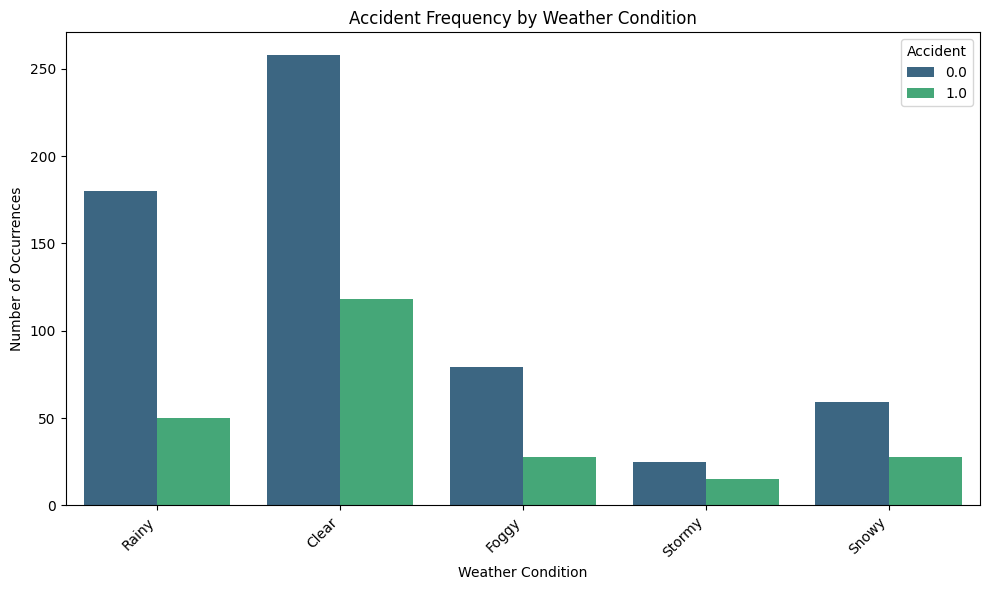


--- Accident Counts and Rates by Weather ---
Accident  0.0  1.0  Total  Accident_Rate
Weather                                 
Stormy     25   15     40      37.500000
Snowy      59   28     87      32.183908
Clear     258  118    376      31.382979
Foggy      79   28    107      26.168224
Rainy     180   50    230      21.739130


In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather', hue='Accident', palette='viridis')
plt.title('Accident Frequency by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate accident counts for each weather condition
weather_accident_counts = df.groupby('Weather')['Accident'].value_counts().unstack(fill_value=0)
weather_accident_counts['Total'] = weather_accident_counts.sum(axis=1)
weather_accident_counts['Accident_Rate'] = weather_accident_counts[1] / weather_accident_counts['Total'] * 100
print("\n--- Accident Counts and Rates by Weather ---")
print(weather_accident_counts.sort_values(by='Accident_Rate', ascending=False))


### 3.2 Accident Frequency by Road Type

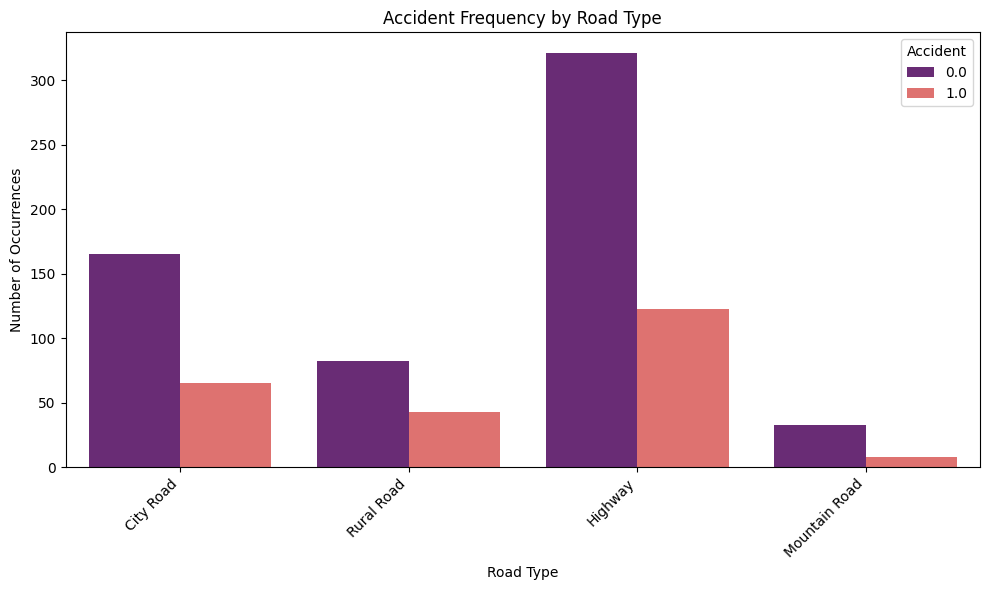


--- Accident Counts and Rates by Road Type ---
Accident       0.0  1.0  Total  Accident_Rate
Road_Type                                    
Rural Road      82   43    125      34.400000
City Road      165   65    230      28.260870
Highway        321  123    444      27.702703
Mountain Road   33    8     41      19.512195


In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Road_Type', hue='Accident', palette='magma')
plt.title('Accident Frequency by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate accident counts for each road type
road_type_accident_counts = df.groupby('Road_Type')['Accident'].value_counts().unstack(fill_value=0)
road_type_accident_counts['Total'] = road_type_accident_counts.sum(axis=1)
road_type_accident_counts['Accident_Rate'] = road_type_accident_counts[1] / road_type_accident_counts['Total'] * 100
print("\n--- Accident Counts and Rates by Road Type ---")
print(road_type_accident_counts.sort_values(by='Accident_Rate', ascending=False))


### 3.3 Accident Frequency by Time of Day

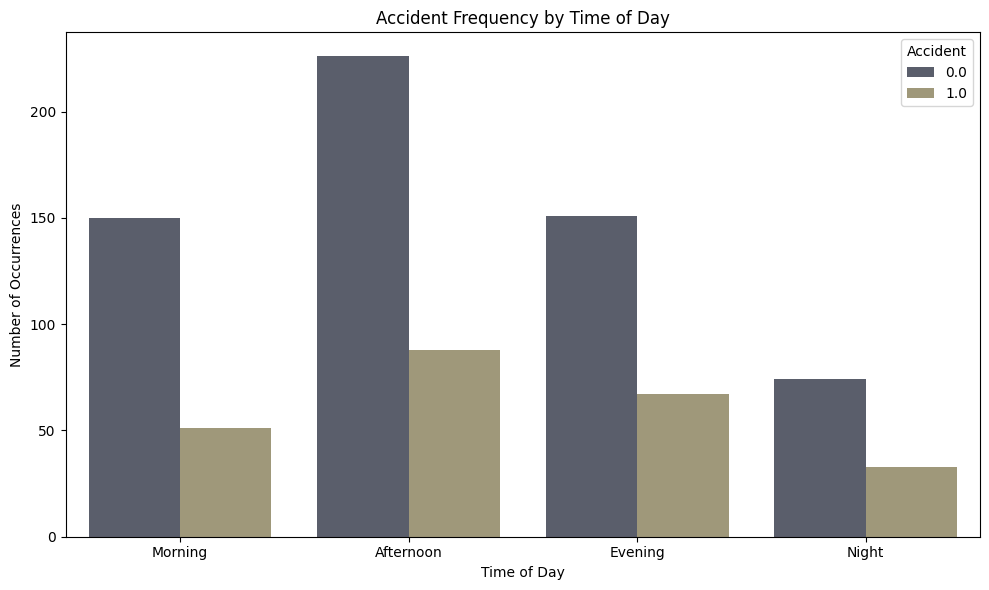


--- Accident Counts and Rates by Time of Day ---
Accident     0.0  1.0  Total  Accident_Rate
Time_of_Day                                
Night         74   33    107      30.841121
Evening      151   67    218      30.733945
Afternoon    226   88    314      28.025478
Morning      150   51    201      25.373134


In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Time_of_Day', hue='Accident', palette='cividis',
              order=['Morning', 'Afternoon', 'Evening', 'Night']) # Order for better visualization
plt.title('Accident Frequency by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Occurrences')
plt.tight_layout()
plt.show()

# Calculate accident counts for each time of day
time_of_day_accident_counts = df.groupby('Time_of_Day')['Accident'].value_counts().unstack(fill_value=0)
time_of_day_accident_counts['Total'] = time_of_day_accident_counts.sum(axis=1)
time_of_day_accident_counts['Accident_Rate'] = time_of_day_accident_counts[1] / time_of_day_accident_counts['Total'] * 100
print("\n--- Accident Counts and Rates by Time of Day ---")
print(time_of_day_accident_counts.sort_values(by='Accident_Rate', ascending=False))


### 3.4 Accident Frequency by Road Condition

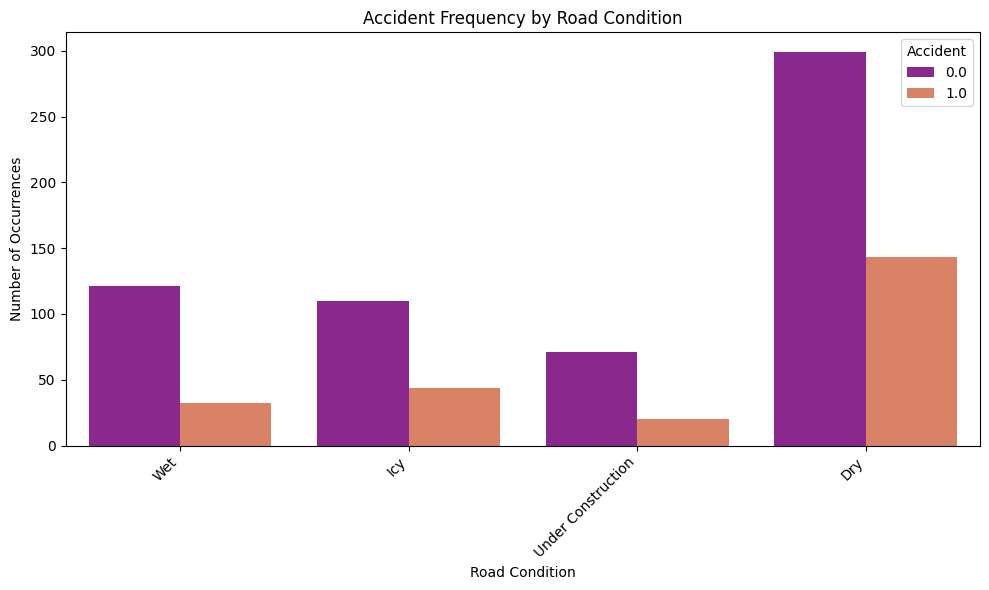


--- Accident Counts and Rates by Road Condition ---
Accident            0.0  1.0  Total  Accident_Rate
Road_Condition                                    
Dry                 299  143    442      32.352941
Icy                 110   44    154      28.571429
Under Construction   71   20     91      21.978022
Wet                 121   32    153      20.915033


In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Road_Condition', hue='Accident', palette='plasma')
plt.title('Accident Frequency by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate accident counts for each road condition
road_condition_accident_counts = df.groupby('Road_Condition')['Accident'].value_counts().unstack(fill_value=0)
road_condition_accident_counts['Total'] = road_condition_accident_counts.sum(axis=1)
road_condition_accident_counts['Accident_Rate'] = road_condition_accident_counts[1] / road_condition_accident_counts['Total'] * 100
print("\n--- Accident Counts and Rates by Road Condition ---")
print(road_condition_accident_counts.sort_values(by='Accident_Rate', ascending=False))


### 3.5 Accident Severity Analysis

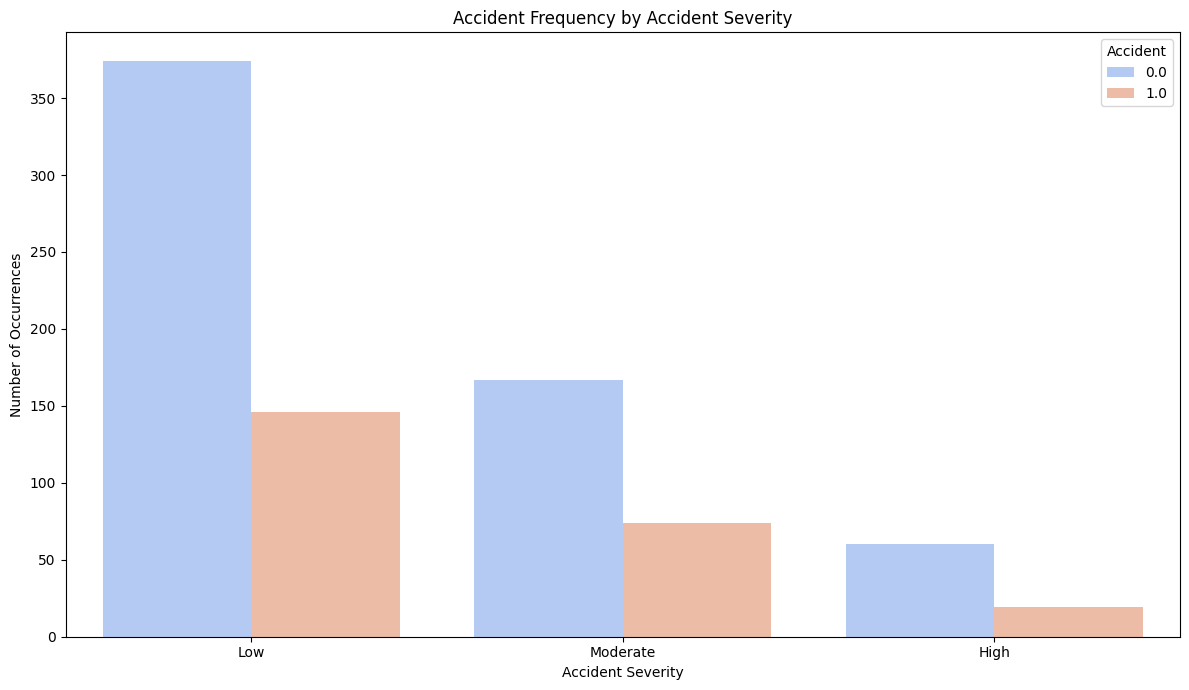


--- Accident Counts and Rates by Accident Severity ---
Accident           0.0  1.0  Total  Accident_Rate
Accident_Severity                                
Moderate           167   74    241      30.705394
Low                374  146    520      28.076923
High                60   19     79      24.050633


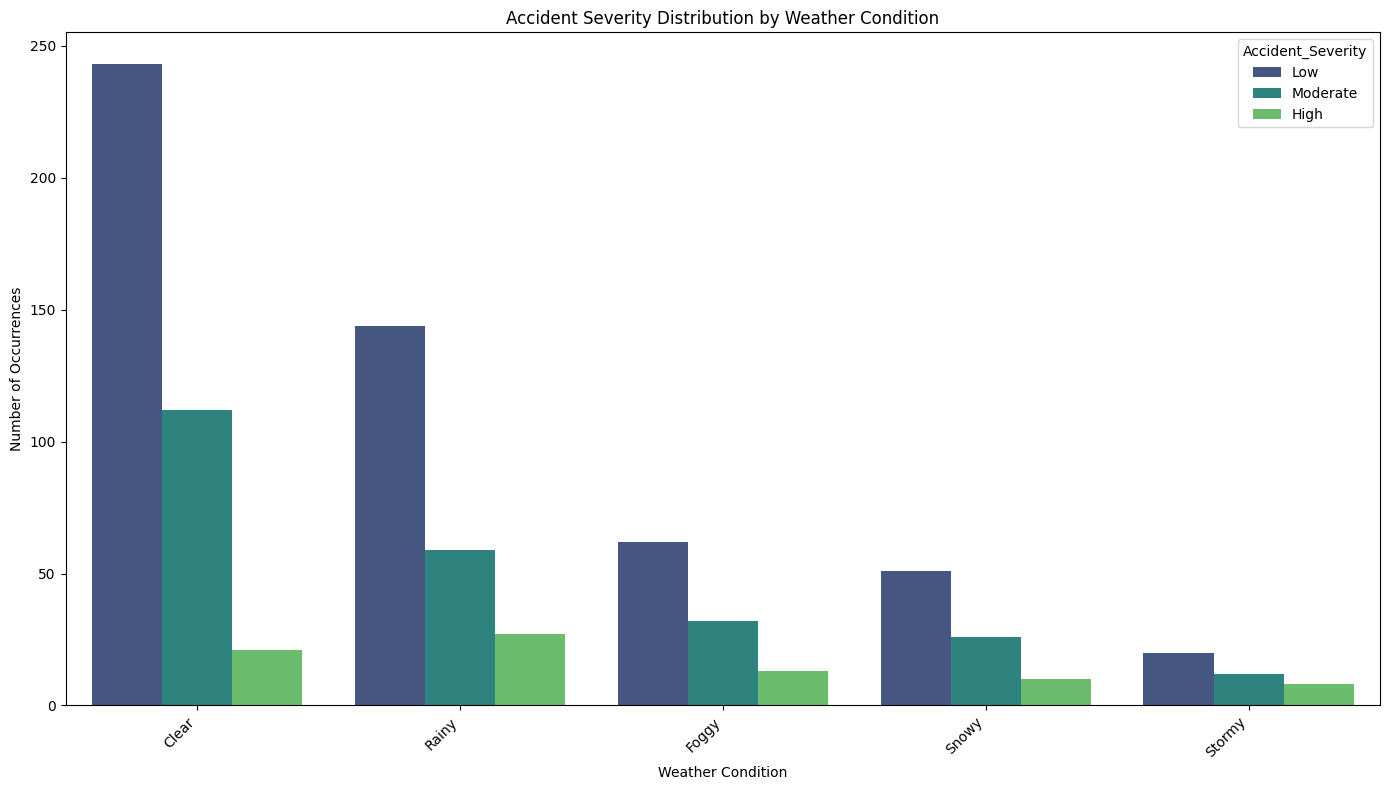

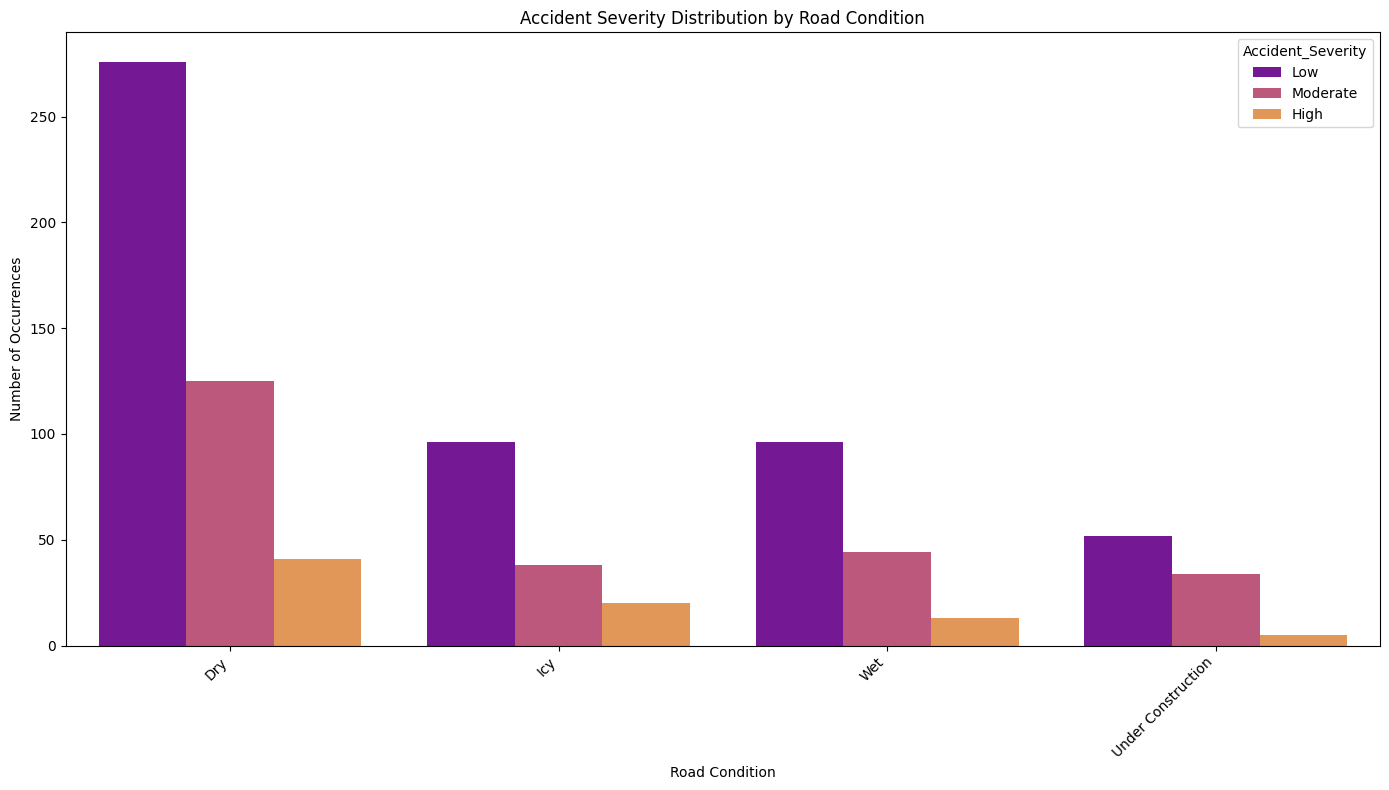

In [7]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Accident_Severity', hue='Accident', palette='coolwarm',
              order=['Low', 'Moderate', 'High']) # Order for better visualization
plt.title('Accident Frequency by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Occurrences')
plt.tight_layout()
plt.show()

# Calculate accident counts for each severity level
severity_accident_counts = df.groupby('Accident_Severity')['Accident'].value_counts().unstack(fill_value=0)
severity_accident_counts['Total'] = severity_accident_counts.sum(axis=1)
severity_accident_counts['Accident_Rate'] = severity_accident_counts[1] / severity_accident_counts['Total'] * 100
print("\n--- Accident Counts and Rates by Accident Severity ---")
print(severity_accident_counts.sort_values(by='Accident_Rate', ascending=False))

# Further breakdown: Accident Severity by Weather
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Weather', hue='Accident_Severity', palette='viridis',
              order=df['Weather'].value_counts().index)
plt.title('Accident Severity Distribution by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Further breakdown: Accident Severity by Road Condition
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Road_Condition', hue='Accident_Severity', palette='plasma',
              order=df['Road_Condition'].value_counts().index)
plt.title('Accident Severity Distribution by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3.6 Combined Factors (Conceptual Hotspots)
To identify "hotspots" by combining factors, we can group by multiple columns and look at accident rates.


--- Accident Rates by Road Type and Time of Day ---
Accident                   0.0  1.0  Total  Accident_Rate
Road_Type     Time_of_Day                                
Rural Road    Night          9    6     15      40.000000
              Evening       21   13     34      38.235294
              Afternoon     31   19     50      38.000000
City Road     Afternoon     59   29     88      32.954545
Highway       Night         41   20     61      32.786885
City Road     Evening       42   19     61      31.147541
Highway       Morning       77   34    111      30.630631
Mountain Road Evening       10    4     14      28.571429
Highway       Evening       78   31    109      28.440367
              Afternoon    125   38    163      23.312883


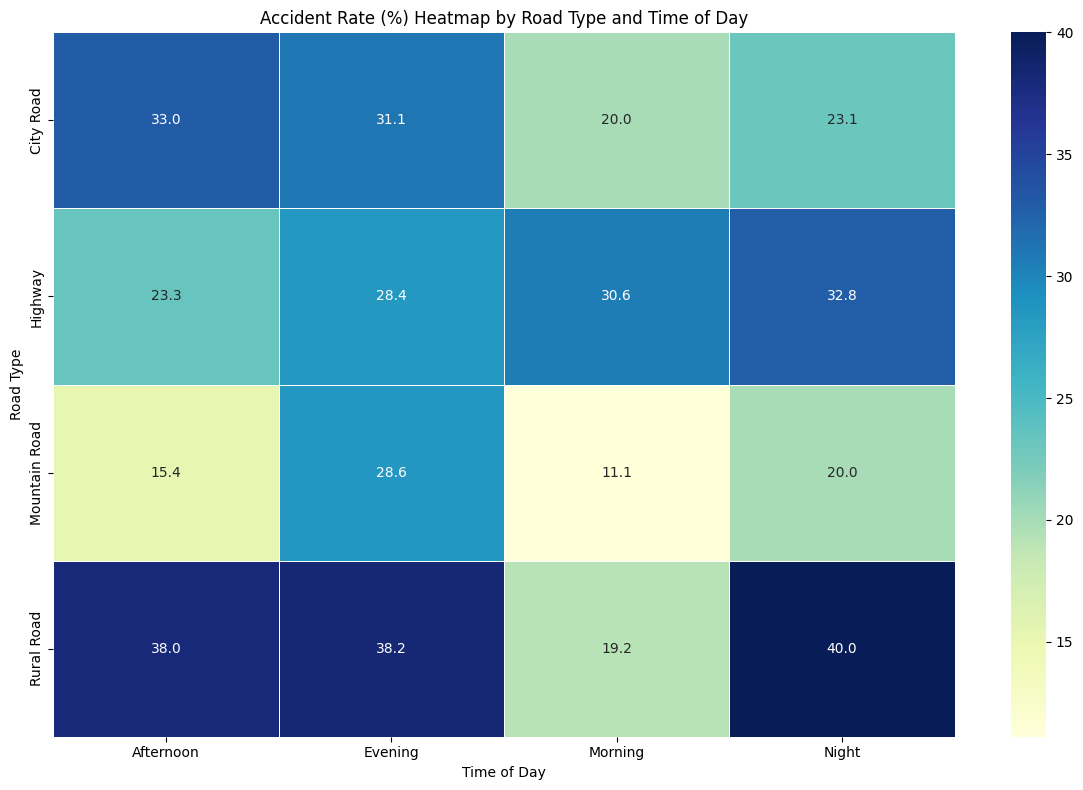


--- Accident Rates by Weather and Road Condition ---
Accident                    0.0  1.0  Total  Accident_Rate
Weather Road_Condition                                    
Stormy  Icy                   6    5     11      45.454545
        Dry                  10    7     17      41.176471
Clear   Dry                 124   76    200      38.000000
Foggy   Icy                  15    9     24      37.500000
Snowy   Wet                  12    7     19      36.842105
Foggy   Under Construction    7    4     11      36.363636
Snowy   Dry                  31   17     48      35.416667
Stormy  Under Construction    4    2      6      33.333333
Clear   Icy                  48   19     67      28.358209
Snowy   Under Construction    6    2      8      25.000000


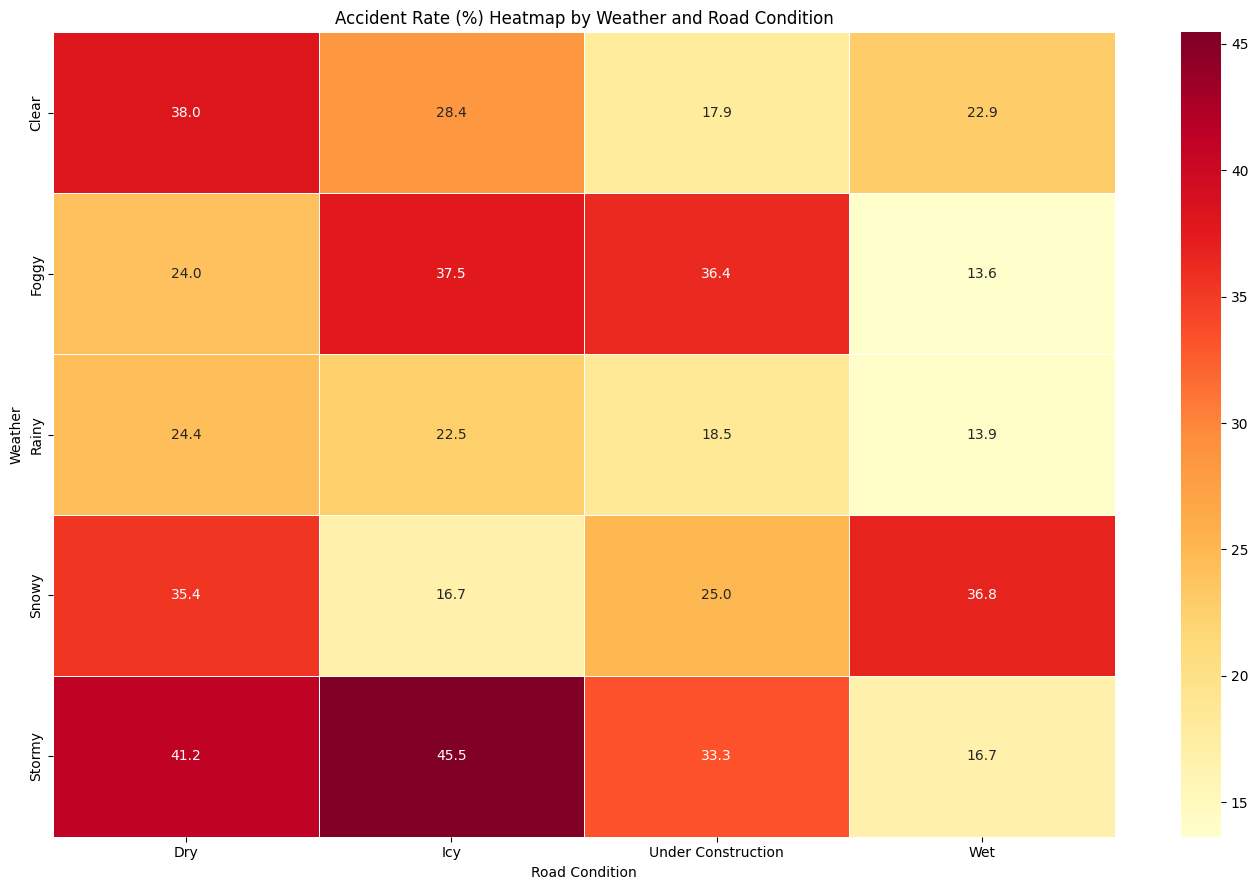

In [8]:
# Example: Accidents by Road Type and Time of Day
road_time_accidents = df.groupby(['Road_Type', 'Time_of_Day'])['Accident'].value_counts().unstack(fill_value=0)
road_time_accidents['Total'] = road_time_accidents.sum(axis=1)
road_time_accidents['Accident_Rate'] = road_time_accidents[1] / road_time_accidents['Total'] * 100
print("\n--- Accident Rates by Road Type and Time of Day ---")
print(road_time_accidents.sort_values(by='Accident_Rate', ascending=False).head(10))

# Visualize as a heatmap (conceptual hotspot)
plt.figure(figsize=(12, 8))
# Pivot the table for heatmap
heatmap_data = road_time_accidents.pivot_table(index='Road_Type', columns='Time_of_Day', values='Accident_Rate', fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Accident Rate (%) Heatmap by Road Type and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Road Type')
plt.tight_layout()
plt.show()

# Example: Accidents by Weather and Road Condition
weather_road_condition_accidents = df.groupby(['Weather', 'Road_Condition'])['Accident'].value_counts().unstack(fill_value=0)
weather_road_condition_accidents['Total'] = weather_road_condition_accidents.sum(axis=1)
weather_road_condition_accidents['Accident_Rate'] = weather_road_condition_accidents[1] / weather_road_condition_accidents['Total'] * 100
print("\n--- Accident Rates by Weather and Road Condition ---")
print(weather_road_condition_accidents.sort_values(by='Accident_Rate', ascending=False).head(10))

# Visualize as a heatmap
plt.figure(figsize=(14, 9))
heatmap_data_2 = weather_road_condition_accidents.pivot_table(index='Weather', columns='Road_Condition', values='Accident_Rate', fill_value=0)
sns.heatmap(heatmap_data_2, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=.5)
plt.title('Accident Rate (%) Heatmap by Weather and Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Weather')
plt.tight_layout()
plt.show()
